

# Project: Investigate a Dataset for  N0_show patients appointment.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
>
> In this project I well investigate why the patient do not show to the appointment. what the reason behind missing the appointment.

Import pandas, numpy,seaborn,matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline





<a id='wrangling'></a>
## Data Wrangling


### General Properties

in cell 2 Load Data

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')


cell 3 retune the dataframe for the first 5 rows.

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


cell4 show the dimensions of the dataframe

In [4]:
df.shape

(110527, 14)

cell 5 show the useful descriptive statistics for each column of data

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


cell 6 displays a summary of the dataframe also the number of non-null values in each column


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


cell 7 show number of unique values in each column

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

cell 8 I drop the cell that I will not use 

In [8]:
df.drop(['AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)

cell 9 show the dataframe after droping the columes

In [9]:
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


cell 10 show all the value in age I see that there is two number need to be drop because there is no age that is -1 or 0

In [10]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

cell 11 for droping row that has 0 in age colume

In [11]:
df.drop(df.index[df['Age'] == 0], inplace = True)

cell 12 for droping row that has -1 in age colume

In [12]:
df.drop(df.index[df['Age'] == -1], inplace = True)

cell 13 show the values in age colume after dropping the invalid numbers

In [13]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

cell 14show the all colume in histogram

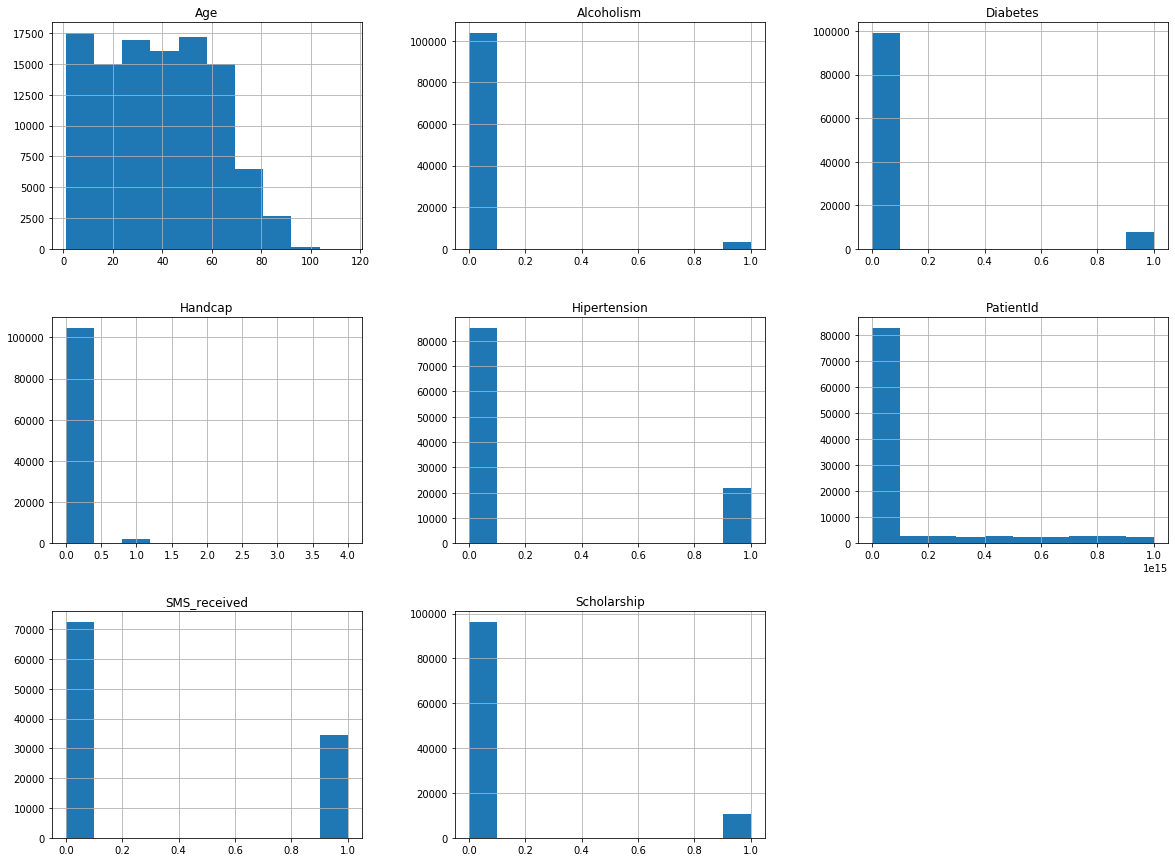

In [14]:
df.hist(figsize=(20,15));


### Data Cleaning:
#### in this section, I will look at the three factors that maybe let the patient not show to the appointment. These  factors are Age, SMS_ recive,and  Gender.

create  variable as mask named (ppl_showed) works as mask for filtering people who were shown to the appointment.

In [15]:
ppl_showed=df['No-show'] =="No"

create  variable as mask named (ppl_showed) works as mask for filtering people who were not shown to the appointment.

In [16]:
ppl_Not_showed=df['No-show'] =="Yes"

looking to the mean of the people who not show to the appointment.

In [17]:
df.Age[ppl_Not_showed].mean()

35.329151291512915

looking to the mean of the people who show to the appointment. I see that people who show to the appointment is more highr than not show

In [18]:
df.Age[ppl_showed].mean()

39.07518726482

This histogram shows the age of people who show and not show to the appointment.
The graph showed that people who are aged between 20 and 50  more likely to not showed to the appointment.


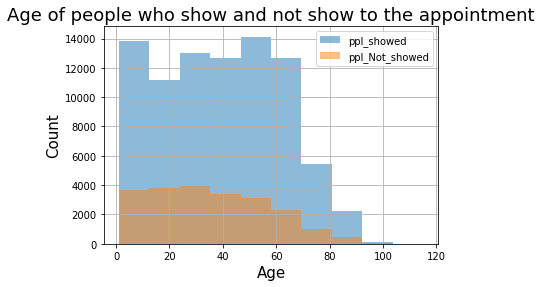

In [19]:
df.Age[ppl_showed].hist(alpha=0.5, label='ppl_showed')
df.Age[ppl_Not_showed].hist(alpha=0.5, label='ppl_Not_showed')
plt.title('Age of people who show and not show to the appointment',fontsize=18)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend();

this histogram shows the SMS_received of people how show and not show to the appointment

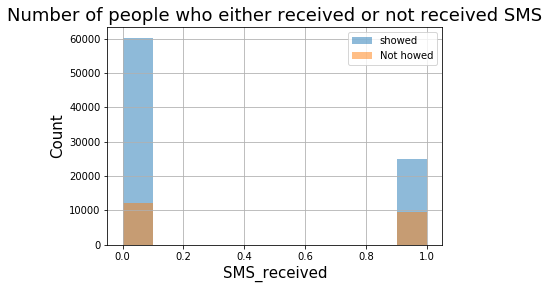

In [20]:
df.SMS_received[ppl_showed].hist(alpha=0.5, label='showed')
df.SMS_received[ppl_Not_showed].hist(alpha=0.5, label='Not howed')
plt.title('Number of people who either received or not received SMS',fontsize=18)
plt.xlabel('SMS_received',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend();



cell 21 show the number of people who receivesed SMS and showed to the appotiment and number of people who did not receive SMS and show to the appointment and compare the number of people who show and not receives massage.

it is clearly seen the number of people who did not receive SMS and came to appotiment is 60290, and who came to appointment and received SMS is 25017. Therefore, people who received SMS are more likley to come to the appointment.

In [21]:
df.groupby('SMS_received')['No-show'].value_counts()

SMS_received  No-show
0             No         60290
              Yes        12112
1             No         25017
              Yes         9568
Name: No-show, dtype: int64

cell 22 shows tha number of female and male who came and not came to the appointment.
We can see that number of female who came to the appointment higher than male.

In [22]:
df.groupby('Gender')['No-show'].value_counts()

Gender  No-show
F       No         55843
        Yes        14275
M       No         29464
        Yes         7405
Name: No-show, dtype: int64

the graph shows tha number of female and male. We can tell that the number of female are more than male therefore it is not consider as factoer in our reaserch

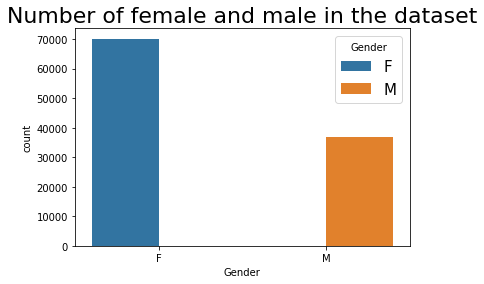

In [23]:
ax = sns.countplot(x="Gender", hue="Gender", data=df)
ax.axes.set_title("Number of female and male in the dataset", fontsize=22)
plt.legend(fontsize=15, title="Gender");

cell 23 shows tha number of female and male. We can tell that the number of female are more than male therefore it is not consider as factoer in our reaserch

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question : What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

###   The results:
   >people who are aged between 20 and 50 more likely to not showed to the appointment.
   
   >the number of people who did not receive SMS and came to appotiment is 60290, and who came to appointment and received SMS is 25017. Therefore, people who received SMS are more likley to come to the appointment.
   
   >We can tell that the number of female are more than male therefore it is not consider as factoer in our reaserch
   


<a id='conclusions'></a>
## Conclusions
To sum up, there is relation between show to the appointment and age. After we look at the data young age were most patients who not showed to thier appointments,whereas,old people often showed to the appointments.

When we look at the SMS factor we see that people who receives massage showed to the appointments.

lastly ,there are more female who showed to thier appointments than male. However, there was a higher number of famele patients than male ,therefore we can say that it is another factors that  can be taken into consideration.


The limitation in our research, the dataset has bayases distratiosin towerd gender since it has more Female than male. So using the Gender as factor could lead to incorrect conclusion.



